In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("./resource/titanic.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S


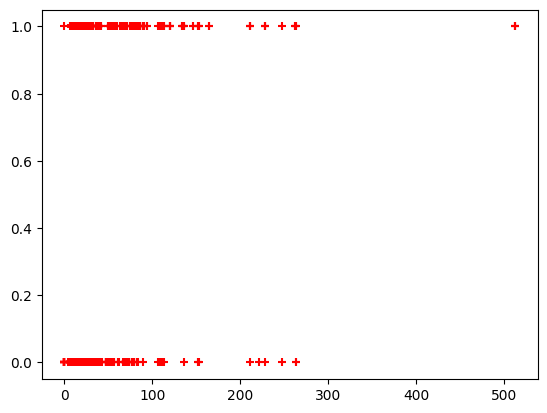

In [59]:
import matplotlib.pyplot as plt
plt.scatter(df.Fare, df.Survived, color='red', marker='+')

In [35]:
df.shape

(891, 12)

In [36]:
datasets = df[['Pclass', 'Sex', 'Age', 'Fare']]
datasets.sample(5)

,Pclass,Sex,Age,Fare
77,3,male,NaN,8.0500
565,3,male,24.0,24.1500
124,1,male,54.0,77.2875
314,2,male,43.0,26.2500
716,1,female,38.0,227.5250


In [37]:
datasets.Pclass = datasets.Pclass.fillna(datasets.Pclass.median())
datasets.Sex = datasets.Sex.ffill()
datasets.Age = datasets.Age.fillna(datasets.Age.median())
datasets.Fare = datasets.Fare.fillna(datasets.Fare.median())

datasets.sample(5)

/tmp/ipykernel_505712/3895652227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets.Pclass = datasets.Pclass.fillna(datasets.Pclass.median())
/tmp/ipykernel_505712/3895652227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets.Sex = datasets.Sex.ffill()
/tmp/ipykernel_505712/3895652227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Pclass,Sex,Age,Fare
457,1,female,28.0,51.8625
134,2,male,25.0,13.0000
252,1,male,62.0,26.5500
369,1,female,24.0,69.3000
298,1,male,28.0,30.5000


In [38]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()


In [40]:
datasets['Sex_n'] = le_sex.fit_transform(datasets.Sex)
datasets.sample(5)

/tmp/ipykernel_505712/307079392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['Sex_n'] = le_sex.fit_transform(datasets.Sex)


,Pclass,Sex,Age,Fare,Sex_n
621,1,male,42.0,52.5542,1
71,3,female,16.0,46.9000,0
697,3,female,28.0,7.7333,0
404,3,female,20.0,8.6625,0
712,1,male,48.0,52.0000,1


In [41]:
datasets = datasets.drop(['Sex'], axis='columns')
datasets.sample(5)

,Pclass,Age,Fare,Sex_n
176,3,28.0,25.4667,1
12,3,20.0,8.0500,1
219,2,30.0,10.5000,1
870,3,26.0,7.8958,1
204,3,18.0,8.0500,1


In [42]:
y = df.Survived.ffill()
y.sample(5)

630    1
85     1
328    1
860    0
614    0
Name: Survived, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datasets, y, test_size=0.2)

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [48]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
model.score(X_test, y_test)

0.7877094972067039

In [50]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0])

In [55]:
model.predict([[3,	45,	50.4667,1]])

/home/javedjarif/Desktop/workdir/ML/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])